<a href="https://colab.research.google.com/github/AlfonsoCastilloFlores/IB_IA_AD2024_1970709/blob/main/Practica2PDI_1970709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

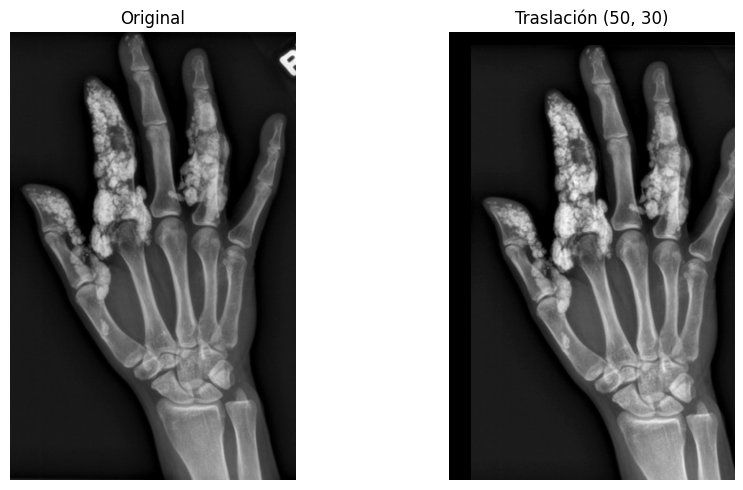

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
image = cv2.imread('/Scleroderma-652x1024.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape  # Obtener dimensiones de la imagen

# Matriz de traslación: Mueve 50 píxeles a la derecha y 30 hacia abajo
M = np.float32([[1, 0, 50], [0, 1, 30]])
translated_image = cv2.warpAffine(image, M, (cols, rows))

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(translated_image, cmap='gray'), plt.title('Traslación (50, 30)'), plt.axis('off')
plt.tight_layout()
plt.show()


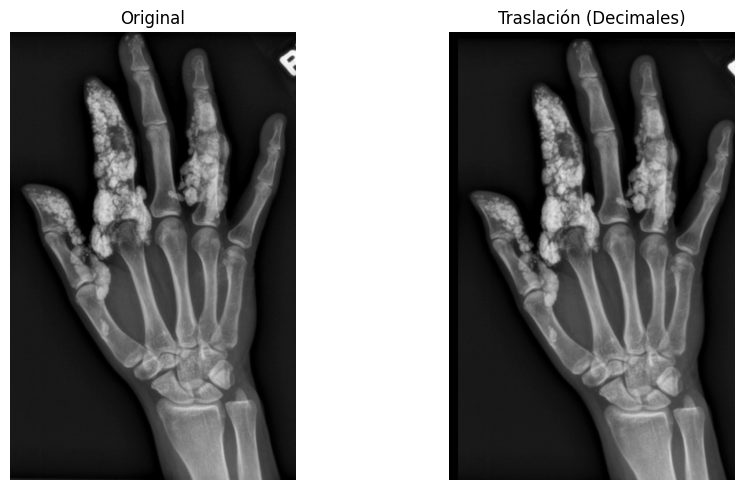

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
image = cv2.imread('/Scleroderma-652x1024.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape  # Obtener dimensiones

# Matriz de traslación: Valores decimales (20.5, 15.5)
M = np.float32([[1, 0, 20.5], [0, 1, 15.5]])
translated_image = cv2.warpAffine(image, M, (cols, rows))

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(translated_image, cmap='gray'), plt.title('Traslación (Decimales)'), plt.axis('off')
plt.tight_layout()
plt.show()


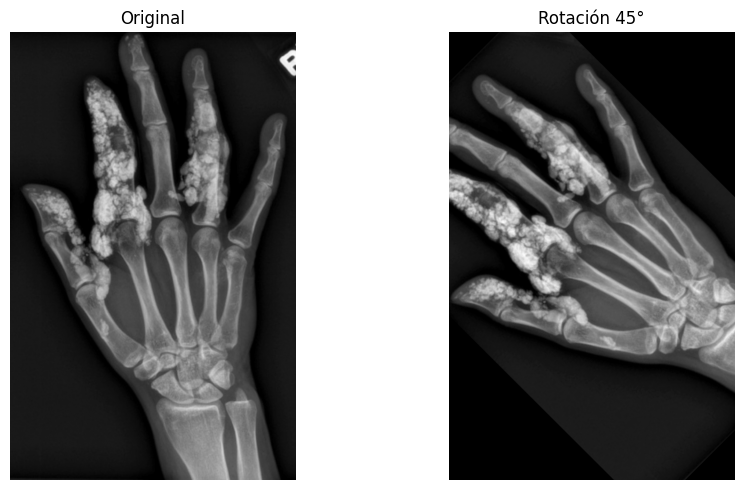

In [5]:
# Definir centro de rotación (centro de la imagen)
center = (cols // 2, rows // 2)

# Crear matriz de rotación para 45 grados, escala 1.0 (sin cambio de tamaño)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

# Aplicar la rotación
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotación 45°'), plt.axis('off')
plt.tight_layout()
plt.show()


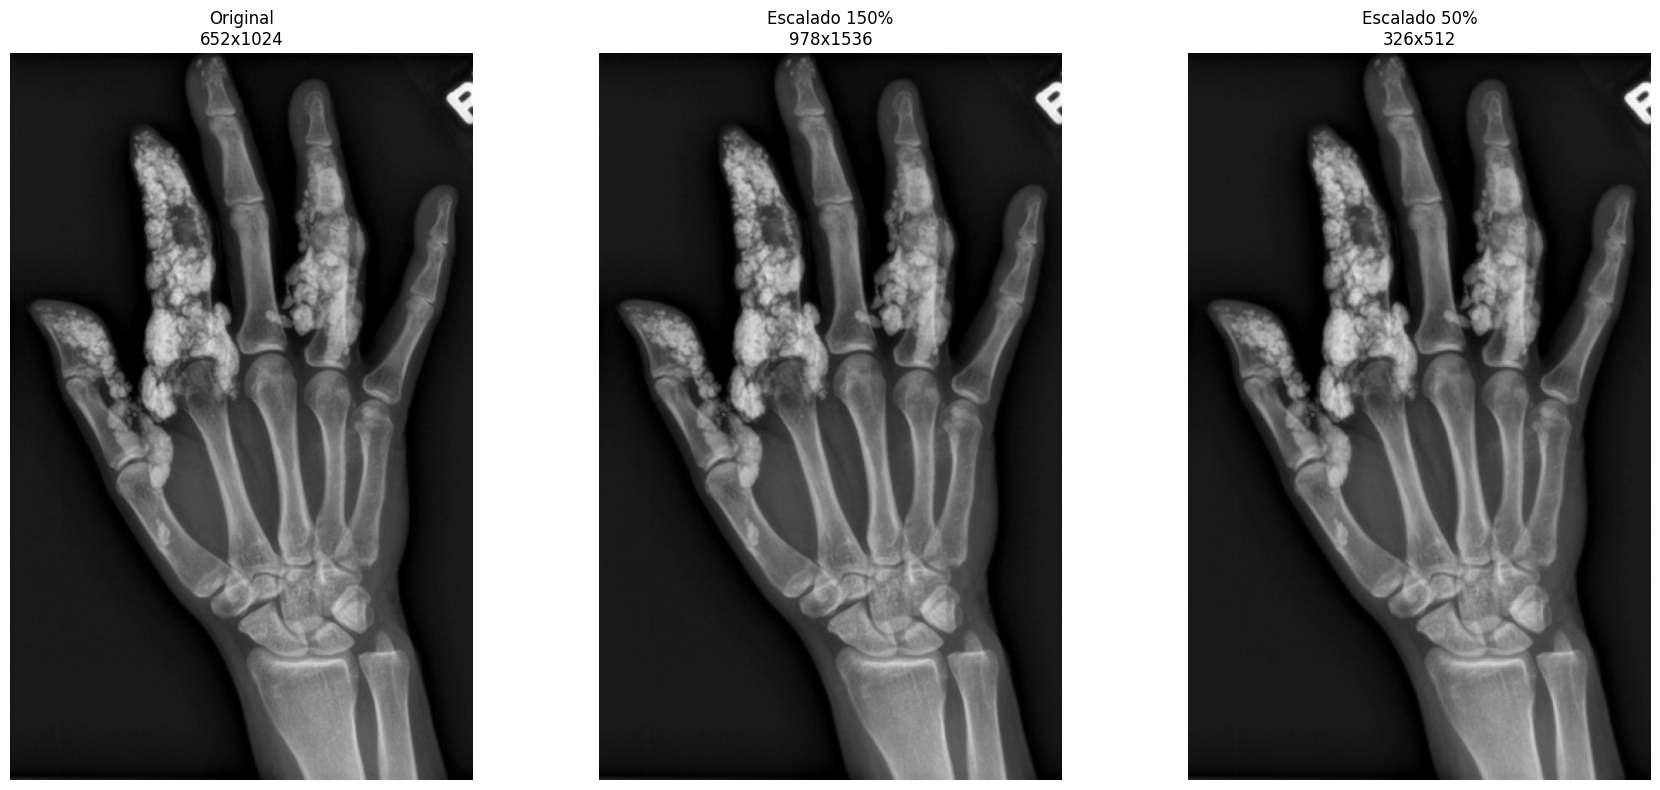

In [6]:
# Escalar imagen al 150% (zoom in) usando interpolación lineal
scaled_up = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Escalar imagen al 50% (zoom out) usando interpolación por área
scaled_down = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Mostrar resultados
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original\n{}x{}'.format(cols, rows)), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(scaled_up, cmap='gray'), plt.title('Escalado 150%\n{}x{}'.format(scaled_up.shape[1], scaled_up.shape[0])), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(scaled_down, cmap='gray'), plt.title('Escalado 50%\n{}x{}'.format(scaled_down.shape[1], scaled_down.shape[0])), plt.axis('off')
plt.tight_layout()
plt.show()


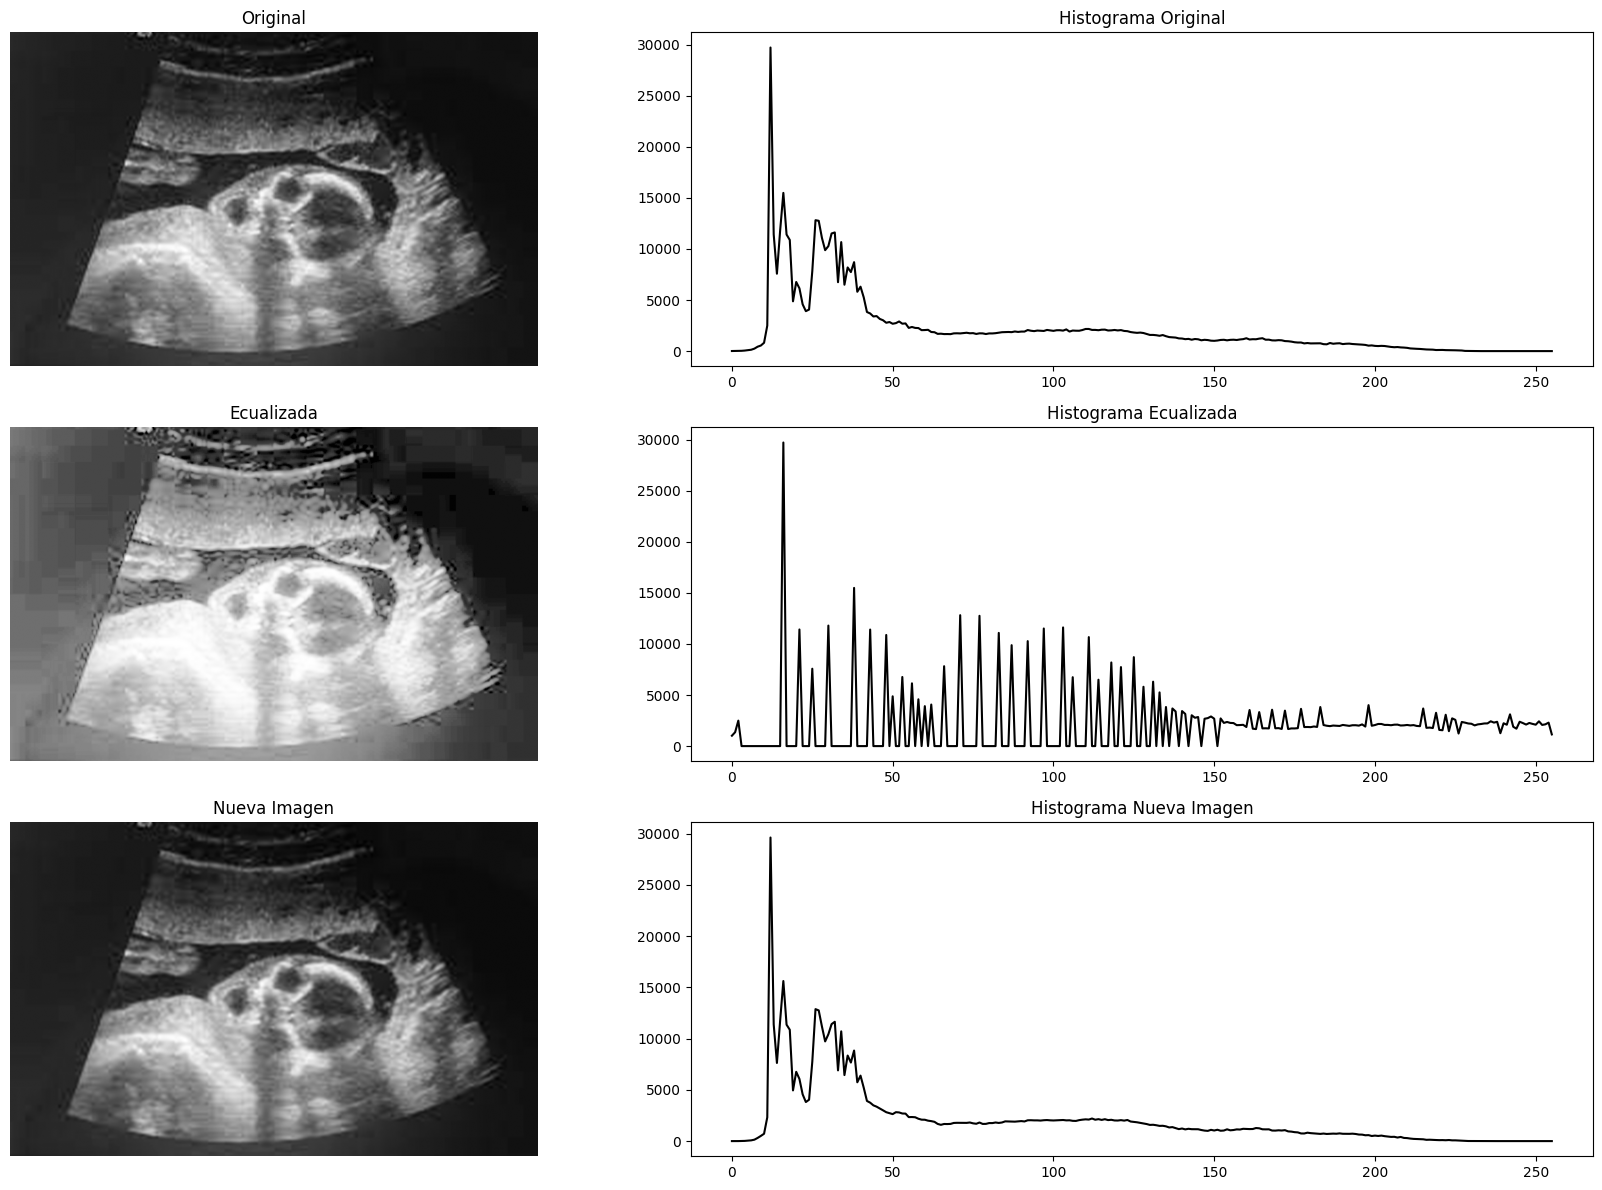

In [1]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
image = cv2.imread('/ecografias_soleste.png', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error al cargar la imagen. Verifica la ruta.")
    exit()

# Ecualización del histograma
equalized_image = cv2.equalizeHist(image)

# NUEVA IMAGEN: Desenfoque Gaussiano (ejemplo)
nueva_imagen = cv2.GaussianBlur(image, (5, 5), 0)

# Calcular histogramas
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
hist_nueva = cv2.calcHist([nueva_imagen], [0], None, [256], [0, 256])

# Graficar imágenes y sus histogramas
plt.figure(figsize=(18, 12))

# Imagen original
plt.subplot(3, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(3, 2, 2), plt.plot(hist_original, color='black'), plt.title('Histograma Original')

# Imagen ecualizada
plt.subplot(3, 2, 3), plt.imshow(equalized_image, cmap='gray'), plt.title('Ecualizada'), plt.axis('off')
plt.subplot(3, 2, 4), plt.plot(hist_equalized, color='black'), plt.title('Histograma Ecualizada')

# Nueva imagen (desenfoque Gaussiano)
plt.subplot(3, 2, 5), plt.imshow(nueva_imagen, cmap='gray'), plt.title('Nueva Imagen'), plt.axis('off')
plt.subplot(3, 2, 6), plt.plot(hist_nueva, color='black'), plt.title('Histograma Nueva Imagen')

plt.tight_layout()
plt.show()
